UFO SIGHTINGS

This project is to pewrfom the cleaning and data analysis/visualization of UFO sightings in the US.
The dataset was download from https://nuforc.org/databank/

In [1]:
#Import the libraries 

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import re
from collections import Counter

In [2]:
read_path = r"datasets\\nuforc_reports.csv"

In [3]:
#Creating the dataframe

df_ufo = pd.read_csv(read_path)
df_ufo.head()

,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text
0,01/2015,1/25/15 21:00,1/26/15,Jacksonville,FL,USA,Light,3 hours,No,https://nuforc.org/webreports/reports/116/S116...,"While laying in bed, I looked out of the windo...",On 01/25/15 at 9pm while laying in bed I looke...
1,05/2018,5/1/18 02:15,5/4/18,Henderson,NV,USA,Light,40 minutes,No,https://nuforc.org/webreports/reports/139/S139...,4 brilliant lights were at first in a diamond ...,4 brilliant lights were at first in a diamond ...
2,05/2018,5/1/18 05:30,8/10/18,Asheville,NC,USA,Diamond,~30 minutes,No,https://nuforc.org/webreports/reports/142/S142...,For weeks a friend of mine observed many small...,For weeks a friend of mine observed many small...
3,05/2018,5/3/18 08:30,5/10/18,Sebastopol,CA,USA,Other,2-3 minutes,No,https://nuforc.org/webreports/reports/139/S139...,"High-altitude, or sub-orbital, UFO, followed b...","High-altitude, or sub-orbital, UFO, followed b..."
4,05/2018,5/1/18 20:00,12/1/19,Apache Junction,AZ,USA,Flash,30-90 minutes,No,https://nuforc.org/webreports/reports/150/S150...,My son had just gotten a telescope for a birth...,My son had just gotten a telescope for a birth...


Exploratory Data Analysis

In [4]:
#Data Information
df_ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141088 entries, 0 to 141087
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Date_Table  141088 non-null  object
 1   Date        141088 non-null  object
 2   Posted      141088 non-null  object
 3   City        141085 non-null  object
 4   State       141062 non-null  object
 5   Country     141086 non-null  object
 6   Shape       141088 non-null  object
 7   Duration    141068 non-null  object
 8   Image       141088 non-null  object
 9   Link        141088 non-null  object
 10  Summary     141088 non-null  object
 11  Text        141054 non-null  object
dtypes: object(12)
memory usage: 12.9+ MB


In [5]:
#Columns
df_ufo.columns

Index(['Date_Table', 'Date', 'Posted', 'City', 'State', 'Country', 'Shape',
       'Duration', 'Image', 'Link', 'Summary', 'Text'],
      dtype='object')

In [6]:
#Datra Description
df_ufo.describe()

,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text
count,141088,141088,141088,141085,141062,141086,141088,141068,141088,141088,141088,141054
unique,971,120482,616,28810,266,439,39,13990,2,141088,138345,139047
top,07/2014,11/7/15 18:00,6/25/20,Phoenix,CA,USA,Light,5 minutes,No,https://nuforc.org/webreports/reports/116/S116...,Unknown,MADAR Node 143
freq,1128,104,1835,758,15466,125766,28395,8571,139753,1,70,69


In [7]:
#Data nulls quantity

df_ufo.isnull().sum()

Date_Table     0
Date           0
Posted         0
City           3
State         26
Country        2
Shape          0
Duration      20
Image          0
Link           0
Summary        0
Text          34
dtype: int64

In [8]:
#Shape
print("The data set has ", df_ufo.shape[0], " rows and " , df_ufo.shape[1], "columns.")


The data set has  141088  rows and  12 columns.


Transforming the Data

In [9]:
def remove_pontuaction(text:str):
    """remove all especial caracter from a text, not including white spaces

    Args:
        text (str): a text 
    """
    regex_pontuaction = r"[^A-Za-z0-9\s]+"
    
    try:
        text = re.sub(regex_pontuaction, "", text)
        return(text)
    except:
        return(text)

In [10]:
def set_duration(word: str):
    """transform a string into a number in seconds, if fails, return 1.

    Args:
        word (str): a string to be transformed into a number in seconds.
    """
    
    # regex to capture the numbers in the string
    regex_number = r"[0-9]+\.?[0-9]*"
    # regex to capture key words in the string
    regex_word = r"[SseveralmMany]{4, 8}"

    # The default valor of the duration.
    number = 1

    # If the encounter number in the duration return the mean 
    if re.search(regex_number, word):
        numbers = re.findall(regex_number, word)
        numbers = [float(x) for x in numbers]
        number = np.mean(numbers)
    # Othrwise search for key words
    elif re.search(regex_word, word):
        number = 2
    
    
    if number <= 0:
        return(1)
    else:
        return(number) 

In [11]:
def remove_comment(text, simple=False):
    """Remove a comment from a text.

    Args:
        text: a text with the comment. 
    """

    # Regext to capture of the comment
    if simple:
        regex_comment = r"\(.*\)"
    else:
        regex_comment = r"\(\(.*\)\)"
    
    try: 
        text_without_comment = re.sub(regex_comment, "", text)
        return(text_without_comment)  
    except:
        return(text)  

In [12]:
from IPython.display import Markdown
from tabulate import tabulate

table = [
  ["Date_Table", "The general date of the sighting."],
  ["Date", "The date and time of the sighting."],
  ["Posted", "When the sighting was posted to the NUFORC site."],
  ["City", "The city of the sighting."],
  ["State", "The 2 character state code of the sighting."],
  ["Country", "The country of the sighting."],
  ["Shape", "The shape of the sighting."],
  ["Duration", "The duration of the sighting in no particular format."],
  ["Link", "A link to the original report on the NUFORC site."],
  ["Image", "If it was provided an image to the report."],
  ["Summary","Summary of the report. Usually the first few sentences."],
  ["Text", "The text of the sighting report."]
  ]
         
Markdown(
  tabulate(
    table, 
    headers=["COLUMN NAME","DESCRIPTION"]
    )
 )

COLUMN NAME    DESCRIPTION
-------------  -------------------------------------------------------
Date_Table     The general date of the sighting.
Date           The date and time of the sighting.
Posted         When the sighting was posted to the NUFORC site.
City           The city of the sighting.
State          The 2 character state code of the sighting.
Country        The country of the sighting.
Shape          The shape of the sighting.
Duration       The duration of the sighting in no particular format.
Link           A link to the original report on the NUFORC site.
Image          If it was provided an image to the report.
Summary        Summary of the report. Usually the first few sentences.
Text           The text of the sighting report.

In [13]:
#How the dataset looks like after transformation
df_ufo.head(10)

,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text
0,01/2015,1/25/15 21:00,1/26/15,Jacksonville,FL,USA,Light,3 hours,No,https://nuforc.org/webreports/reports/116/S116...,"While laying in bed, I looked out of the windo...",On 01/25/15 at 9pm while laying in bed I looke...
1,05/2018,5/1/18 02:15,5/4/18,Henderson,NV,USA,Light,40 minutes,No,https://nuforc.org/webreports/reports/139/S139...,4 brilliant lights were at first in a diamond ...,4 brilliant lights were at first in a diamond ...
2,05/2018,5/1/18 05:30,8/10/18,Asheville,NC,USA,Diamond,~30 minutes,No,https://nuforc.org/webreports/reports/142/S142...,For weeks a friend of mine observed many small...,For weeks a friend of mine observed many small...
3,05/2018,5/3/18 08:30,5/10/18,Sebastopol,CA,USA,Other,2-3 minutes,No,https://nuforc.org/webreports/reports/139/S139...,"High-altitude, or sub-orbital, UFO, followed b...","High-altitude, or sub-orbital, UFO, followed b..."
4,05/2018,5/1/18 20:00,12/1/19,Apache Junction,AZ,USA,Flash,30-90 minutes,No,https://nuforc.org/webreports/reports/150/S150...,My son had just gotten a telescope for a birth...,My son had just gotten a telescope for a birth...
5,05/2018,5/1/18 16:00,5/4/18,Knoxville,TN,USA,Oval,15-320 minutes,No,https://nuforc.org/webreports/reports/139/S139...,"Silver, oval-shaped UFO, that stayed in the sa...","Silver and oval shaped UFO, that stayed in the..."
6,05/2018,5/1/18 23:00,5/31/18,Lawrenceville,GA,USA,Circle,Unknown,No,https://nuforc.org/webreports/reports/141/S141...,Have picture. Blue. Much larger than a star st...,Have picture but nowhere to attach with this r...
7,05/2018,5/2/18 14:00,5/4/18,Farmington,UT,USA,Egg,10 minutes,No,https://nuforc.org/webreports/reports/139/S139...,Driving on Legacy Highway from West Valley to ...,Driving on Legacy Highway from West Valley to ...
8,05/2018,5/2/18 20:30,5/4/18,Lamesa,TX,USA,Egg,4 seconds,No,https://nuforc.org/webreports/reports/139/S139...,"Egg shape object over Lamesa, TX.","Egg shape object over Lamesa, TX. \nSaw egg s..."
9,05/2018,5/2/18 20:00,5/4/18,Greenville,PA,USA,Light,2 hours,No,https://nuforc.org/webreports/reports/139/S139...,Same as last nite only it was moving around. ...,Same as last nite only it was moving around. ...


In [14]:
df_ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141088 entries, 0 to 141087
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Date_Table  141088 non-null  object
 1   Date        141088 non-null  object
 2   Posted      141088 non-null  object
 3   City        141085 non-null  object
 4   State       141062 non-null  object
 5   Country     141086 non-null  object
 6   Shape       141088 non-null  object
 7   Duration    141068 non-null  object
 8   Image       141088 non-null  object
 9   Link        141088 non-null  object
 10  Summary     141088 non-null  object
 11  Text        141054 non-null  object
dtypes: object(12)
memory usage: 12.9+ MB


In [15]:
# Dataset shape
print(f'The dataset has {df_ufo.shape[0]} lines and {df_ufo.shape[1]} columns with the following types and number of missing values per columns:\n')

type_df = pd.DataFrame(df_ufo.dtypes,columns=['Column type'])
null_df = pd.DataFrame(df_ufo.isnull().sum(), columns = ['Missing values'])

type_and_null_df = pd.merge(type_df,null_df,right_index=True,left_index=True)

# Dataset 
display(type_and_null_df)

The dataset has 141088 lines and 12 columns with the following types and number of missing values per columns:



,Column type,Missing values
Date_Table,object,0
Date,object,0
Posted,object,0
City,object,3
State,object,26
Country,object,2
Shape,object,0
Duration,object,20
Image,object,0
Link,object,0


In [16]:
(df_ufo.Country
 .value_counts(normalize=True, dropna=False)
 .nlargest(10)
 .apply(lambda x: str(round(x * 100,2)) + '%')
 .to_frame(name='Percentage of sightings per country'))

,Percentage of sightings per country
USA,89.14%
Canada,4.01%
United Kingdom,2.22%
Australia,0.63%
India,0.31%
Mexico,0.27%
Unknown,0.2%
Germany,0.14%
New Zealand,0.14%
South Africa,0.13%


Given that the concentration of UFO sightings is in the US, we will only work with data from there.

In [17]:
# Fiter the data to only contain USA.
df_ufo.query('Country == "USA"', inplace=True)

In [18]:
# Veifing if it the worked
df_ufo.Country.unique()

array(['USA'], dtype=object)

In [19]:
wrong_city_df = df_ufo.loc[(df_ufo.City.str.contains('[^a-zA-Z\s\.]', na=False)) & (df_ufo.City != 'Washington, D.C.')]

print(wrong_city_df.shape)
wrong_city_df.sample(10)

(6858, 12)


,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text
71930,02/2014,2/21/14 19:45,2/27/14,(City not specified),MO,USA,Other,15 seconds,No,https://nuforc.org/webreports/reports/107/S107...,((HOAX??)) Orange flower.,Orange flower. \nwhen i saw this object was li...
11798,10/1998,10/4/98 05:00,11/1/98,Columbia River { mile marker 230},WA,USA,Fireball,3 seconds,No,https://nuforc.org/webreports/reports/004/S045...,"Flaring green fireball,with sparks and smoke t...","Flaring green fireball,with sparks and smoke t..."
528,11/1976,11/25/76 20:20,7/28/10,Virginia (western part; rural?),VA,USA,Fireball,2 minutes,No,https://nuforc.org/webreports/reports/076/S767...,White light above cloud cover speed about 3000...,White light above cloud cover speed about 3000...
43130,10/2003,10/26/03 22:30,10/31/03,O'Fallon,IL,USA,Other,Aprox. 3 minutes,No,https://nuforc.org/webreports/reports/032/S326...,I am now a believer in UFO's because of my exp...,I am now a believer in UFO's because of my exp...
22825,11/2006,11/2/06 20:00,12/7/06,Gaffney (near),SC,USA,Light,30 seconds,No,https://nuforc.org/webreports/reports/053/S533...,"two very bright looking stars, top once flicke...","two very bright looking stars, top once flicke..."
138443,12/1952,12/15/52,6/25/20,Dugway (in the vicinity of),UT,USA,Unknown,Unknown,No,https://nuforc.org/webreports/reports/156/S156...,USAF pilot cadet encounters a UFO while on a n...,USAF pilot cadet encounters a UFO while on a n...
108758,07/2015,7/4/15 21:00,7/10/15,Canton/Marietta,GA,USA,Other,4 minutes,No,https://nuforc.org/webreports/reports/120/S120...,"Appeared to be several hundred feet up, travel...","Appeared to be several hundred feet up, travel..."
50679,01/2014,1/12/14 17:23,1/16/14,Mukilteo/Everett,WA,USA,Unknown,3 minutes,No,https://nuforc.org/webreports/reports/106/S106...,"Weird high pitch noises pulsing, weird BOOM ou...","Weird high pitch noises pulsing, weird BOOM ou..."
34718,11/2007,11/23/07 23:00,1/10/09,New York City (Manhattan),NY,USA,Light,few seconds,No,https://nuforc.org/webreports/reports/067/S676...,very shiny object that I captured movie from t...,Very shiny object that I captured movie from t...
58280,01/2014,1/15/14,1/24/14,Crystal Spring (near),TX,USA,Oval,1 minute,No,https://nuforc.org/webreports/reports/106/S106...,"Bright light in the sky, lasted one minute, mo...","Bright light in the sky, lasted one minute, mo..."


In [20]:
# remove unnecessary spaces
df_ufo['City'] = df_ufo.City.str.strip()
# Capitalize the whole column
df_ufo['City'] = df_ufo.City.str.capitalize()

# Replace { with (
df_ufo['City'] = df_ufo.City.str.replace('{', '\(', regex=True)
# Remove all comments
df_ufo['City'] = df_ufo.City.apply(lambda x: remove_comment(x, simple=True))

# Replace all variationof Washington DC 
df_ufo.loc[(df_ufo.City.str.contains('Washington', na=False)) & (df_ufo.State == 'DC'), 'City'] = 'Washington, D.C.'
# Replace all lines with ? with  Unknown
df_ufo.loc[(df_ufo.City.str.contains('\?', na=False)), 'City'] = 'Unknown'

In [21]:
wrong_city_df = df_ufo.loc[(df_ufo.City.str.contains('[^a-zA-Z\s\.]', na=False)) & (df_ufo.City != 'Washington, D.C.')]

print(wrong_city_df.shape)
wrong_city_df.sample(10)

(2607, 12)


,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text
26840,12/1996,12/25/96 02:35,11/20/02,Fresno/stockton,CA,USA,Light,several minutes,No,https://nuforc.org/webreports/reports/001/S019...,"Radio show call in, single object obsevred as ...","SUMMARY: Radio show call in, single object ob..."
28810,03/2007,3/16/07 06:20,4/27/07,Stoughton/cooksville area,WI,USA,Circle,1-2 min,No,https://nuforc.org/webreports/reports/055/S557...,hovering mass of lights over Stoughton WI,hovering mass of lights over Stoughton WI \nDr...
80837,07/2016,7/1/16 11:00,8/20/20,In-flight sighting,AR,USA,Sphere,5 seconds,No,https://nuforc.org/webreports/reports/158/S158...,Round dark metallic object 70 yards from jet a...,Round dark metallic object 70 yards from jet a...
20046,05/1998,5/12/98 16:00,9/2/05,Kinston/richlands,NC,USA,Cigar,few seconds,No,https://nuforc.org/webreports/reports/045/S452...,"Cigar-shaped craft, traveling over road in cou...","Cigar-shaped craft, traveling over road in cou..."
1262,10/1981,10/18/81 07:30,9/26/98,Detroit/warm springs,OR,USA,Cigar,one hour,No,https://nuforc.org/webreports/reports/002/S025...,Single small vehicle left main body and follow...,Summary : Single small vehicle left main body ...
126522,02/2017,2/7/17 23:15,2/10/17,Land o'lakes,FL,USA,Light,1 minute,No,https://nuforc.org/webreports/reports/132/S132...,Green neon light in the shape of an orb crosse...,Green neon light in the shape of an orb crosse...
84978,02/2009,2/5/09 21:00,3/19/09,Weslaco/mcallen,TX,USA,Light,40 MIN,No,https://nuforc.org/webreports/reports/068/S684...,My friend was driving west on expressway 83; n...,My friend was driving west on expressway 83 wh...
20645,06/1997,6/15/97 09:00,2/16/00,"Oak brook terrace, dorathy drennon park in",IL,USA,Disk,Five minutes,No,https://nuforc.org/webreports/reports/011/S117...,It all happened at a park there was a U.F.O in...,It all happened at a park there was a U.F.O in...
53459,12/2002,12/6/02 19:30,12/23/02,Wilsonville/tualatin,OR,USA,Unknown,3-5 seconds,No,https://nuforc.org/webreports/reports/026/S264...,I was headed North on I-5 when I saw a glowing...,I was headed North on I-5 when I saw a glowing...
12986,08/1999,8/15/99 20:30,7/1/02,Gila bend/yuma,AZ,USA,Fireball,2 minutes,No,https://nuforc.org/webreports/reports/017/S172...,I saw an intense orange ball of fire that was ...,I saw an intense orange ball of fire that was ...


We can observe in the 'State' column that there were few observations with values that do not count in the list of American states (source: https://www.scouting.org/resources/los/states/), since there are few occurrences, I preferred to replace them by 'Unknown' and continue the analysis.

In [22]:
df_ufo.State.unique()

array(['FL', 'NV', 'NC', 'CA', 'AZ', 'TN', 'GA', 'UT', 'TX', 'PA', 'KY',
       'VA', 'OK', 'MN', 'NH', 'WA', 'SC', 'NJ', 'AR', 'MO', 'OH', 'KS',
       'LA', 'CO', 'NY', 'WY', 'IN', 'MT', 'AK', 'IL', 'MI', 'IA', 'ME',
       'OR', 'WI', 'MS', 'ID', 'DE', 'WV', 'MD', 'HI', 'AL', 'CT', 'RI',
       'NM', 'NE', 'Unknown', 'MA', 'VT', 'SD', 'ND', 'Guam', 'DC', 'Ca',
       'Fl', 'Washington, DC', 'ON', 'Ontario', 'AB', nan, '\nMA',
       'American Samoa', 'Quintana Roo', 'NB', 'M0', 'SK',
       'United States Virgin Islands', 'Cornwall', 'MB', 'NS', 'BC',
       'South Carolina'], dtype=object)

In [23]:
(df_ufo.State
 .value_counts()
 .nsmallest(20))

Ca                                1
M0                                1
BC                                1
NS                                1
MB                                1
Cornwall                          1
United States Virgin Islands      1
SK                                1
NB                                1
Washington, DC                    1
Quintana Roo                      1
American Samoa                    1
\nMA                              1
AB                                1
Ontario                           1
Guam                              1
South Carolina                    1
Fl                                5
ON                                5
DC                              139
Name: State, dtype: int64

In [24]:
states_error_lst = (df_ufo.State
                    .value_counts()
                    .nsmallest(19)
                    .index.to_list())



df_ufo.loc[df_ufo.State.isin(states_error_lst), 'State'] = 'Unknown'
df_ufo['State'] = df_ufo.State.fillna('Unknown')

df_ufo.State.unique()

array(['FL', 'NV', 'NC', 'CA', 'AZ', 'TN', 'GA', 'UT', 'TX', 'PA', 'KY',
       'VA', 'OK', 'MN', 'NH', 'WA', 'SC', 'NJ', 'AR', 'MO', 'OH', 'KS',
       'LA', 'CO', 'NY', 'WY', 'IN', 'MT', 'AK', 'IL', 'MI', 'IA', 'ME',
       'OR', 'WI', 'MS', 'ID', 'DE', 'WV', 'MD', 'HI', 'AL', 'CT', 'RI',
       'NM', 'NE', 'Unknown', 'MA', 'VT', 'SD', 'ND', 'DC'], dtype=object)

In [25]:
(df_ufo.State
 .value_counts()
 .nsmallest(20))

DC          139
ND          268
SD          377
DE          392
WY          396
Unknown     413
RI          581
VT          586
AK          618
HI          651
NE          671
MS          751
WV          865
MT          967
LA         1069
KS         1129
NH         1135
ME         1144
IA         1169
AR         1214
Name: State, dtype: int64

In [26]:
df_ufo.sample(15)

,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text
82004,04/2012,4/26/12 01:45,5/13/12,Topeka,KS,USA,Other,10 sec,No,https://nuforc.org/webreports/reports/088/S886...,Shadow like v shape no lights about no more th...,shadow like v shape no lights about no more th...
90004,12/2009,12/12/09 22:00,2/14/10,Media,PA,USA,Circle,5 seconds,No,https://nuforc.org/webreports/reports/073/S736...,"One Blue ""fireball"" moved rapidly across the sky.","One Blue ""fireball"" moved rapidly across the s..."
130309,11/2016,11/21/16 07:30,12/5/16,Pearisburg,VA,USA,Triangle,5 minutes,No,https://nuforc.org/webreports/reports/131/S131...,Triangular object with green lights.,Triangular object with green lights \nI was wa...
100387,09/2017,9/9/17 20:30,9/21/17,Southport,IN,USA,Light,45 seconds,No,https://nuforc.org/webreports/reports/136/S136...,Standing in the parking lot talking with my co...,Standing in the parking lot talking with my co...
11853,10/1998,10/15/98 16:01,11/1/98,Winston-salem,NC,USA,Sphere,12 sec,No,https://nuforc.org/webreports/reports/004/S045...,silver-white sphere crossed sky in 12 sec.,Silver-white sphere crossed sky in 12 sec. \nW...
87833,11/2015,11/7/15 18:00,11/12/15,Riverside,CA,USA,Light,5 minutes,No,https://nuforc.org/webreports/reports/123/S123...,Big ball of light like it was a helicopter spo...,Big ball of light like it was a helicopter spo...
32984,12/2013,12/5/13 06:00,12/12/13,Reno,NV,USA,Triangle,5 minutes,No,https://nuforc.org/webreports/reports/105/S105...,s meadows ufo sighting.,s meadows ufo sighting \nAs I got off the high...
75176,11/2013,11/28/13 21:15,12/2/13,Brick,NJ,USA,Circle,2 minutes,No,https://nuforc.org/webreports/reports/104/S104...,Purple spherical light in the sky.,Purple spherical light in the sky. \nMy girlfr...
35258,06/2007,6/28/07 22:00,8/7/07,Garden city beach,SC,USA,Light,2 Hours,No,https://nuforc.org/webreports/reports/057/S573...,Orange lights near Myrtle Beach S.C. appear at...,Orange lights near Myrtle Beach S.C. appear at...
57870,10/2014,10/17/14 21:45,11/6/14,Spencer,NY,USA,Other,45 minutes,No,https://nuforc.org/webreports/reports/114/S114...,4 large orbs moving in a circular pattern then...,Witnessed 4 large orbs moving in a circular pa...


Date Time and Stats Columns

In [27]:
date = [x[0] for x in df_ufo.Date.str.split(' ')]
time = [' ' + x[-1] for x in df_ufo.Date.str.split(' ')]
day = [(x.split('/')[1] + '/') if (len(x.split('/')) == 3) else '01/' for x in date]

df_ufo['Date_Table'] = day + df_ufo['Date_Table'] + time

In [28]:
df_ufo['Date_Table'] = pd.to_datetime(df_ufo['Date_Table'], format='%d/%m/%Y %H:%M', errors='coerce')
df_ufo['Date'] = pd.to_datetime(df_ufo['Date'], format='%m/%d/%y %H:%M', errors='coerce')
df_ufo['Posted'] = pd.to_datetime(df_ufo['Date'], format='%m/%d/%y', errors='coerce')


print('### DATE TABLE ###')
print(f'The first date in the data_time column is: {df_ufo.Date_Table.min()}\n')
print(f'The last date in the data_time column is: {df_ufo.Date_Table.max()}\n')

print('### DATE SIGHTING ###')
print(f'The first date in the data_time column is: {df_ufo.Date.min()}\n')
print(f'The last date in the data_time column is: {df_ufo.Date.max()}\n')

print('### DATE POSTED ###')
print(f'The first date in the data_time column is: {df_ufo.Posted.min()}\n')
print(f'The last date in the data_time column is: {df_ufo.Posted.max()}\n')

### DATE TABLE ###
The first date in the data_time column is: 1721-02-01 05:24:00

The last date in the data_time column is: 2022-10-08 21:00:00

### DATE SIGHTING ###
The first date in the data_time column is: 1969-01-01 10:00:00

The last date in the data_time column is: 2068-12-25 03:00:00

### DATE POSTED ###
The first date in the data_time column is: 1969-01-01 10:00:00

The last date in the data_time column is: 2068-12-25 03:00:00



In [29]:
df_ufo['Date'] = df_ufo.Date_Table
df_ufo.drop(columns=['Date_Table' , 'Posted'], inplace=True)

df_ufo['Year'] = df_ufo.Date.dt.year
df_ufo['Month'] = df_ufo.Date.dt.month
df_ufo['Day_of_Month'] = df_ufo.Date.dt.day
df_ufo['Day_of_Week'] = df_ufo.Date.dt.weekday
df_ufo['Day_Name'] = df_ufo.Date.dt.day_name()
df_ufo['Hour'] = df_ufo.Date.dt.hour

print('### DATE SIGHTING ###')
print(f'The first date in the data_time column is: {df_ufo.Date.min()}\n')
print(f'The last date in the data_time column is: {df_ufo.Date.max()}\n')

### DATE SIGHTING ###
The first date in the data_time column is: 1721-02-01 05:24:00

The last date in the data_time column is: 2022-10-08 21:00:00



In [30]:
df_ufo.sample(15)

,Date,City,State,Country,Shape,Duration,Image,Link,Summary,Text,Year,Month,Day_of_Month,Day_of_Week,Day_Name,Hour
85441,2011-05-05 19:30:00,Ovalo,TX,USA,Oval,15-20 second,No,https://nuforc.org/webreports/reports/090/S906...,"Hovering, illuminated, white oval gradually di...","Hovering, illuminated, white oval gradually di...",2011.0,5.0,5.0,3.0,Thursday,19.0
10360,2000-09-10 18:30:00,Geneva,NE,USA,Light,15sec.,No,https://nuforc.org/webreports/reports/014/S148...,one bright object which turned into eleven,one bright object which turned into eleven \nI...,2000.0,9.0,10.0,6.0,Sunday,18.0
29754,2004-09-12 03:00:00,Fairbanks,AK,USA,Oval,3 hours,No,https://nuforc.org/webreports/reports/039/S395...,Very Distant odd luminous light hangs in the N...,Very Distant odd luminous light hangs in the N...,2004.0,9.0,12.0,6.0,Sunday,3.0
124661,2018-01-02 06:38:00,Olive branch,MS,USA,Cylinder,10-15 seconds,No,https://nuforc.org/webreports/reports/138/S138...,Two cylinder type objects or shadows traversin...,Two cylinder type objects or shadows traversin...,2018.0,1.0,2.0,1.0,Tuesday,6.0
105215,2022-08-19 21:45:00,Monhegan island,NH,USA,Cylinder,25 seconds,Yes,https://nuforc.org/webreports/reports/171/S171...,Appeared below the Big Dipper and continued up...,Appeared below the Big Dipper and continued up...,2022.0,8.0,19.0,4.0,Friday,21.0
78671,2011-02-07 19:30:00,Oak park,CA,USA,Other,15 min,No,https://nuforc.org/webreports/reports/079/S799...,This is my account of what my daughter and I s...,This is my account of what my daughter and I s...,2011.0,2.0,7.0,0.0,Monday,19.0
90530,2009-04-16 17:25:00,Greenwich,CT,USA,Cylinder,1minute,No,https://nuforc.org/webreports/reports/069/S696...,Cylindrical object in South Wester Connecticut,Cylindrical object in South Wester Connecticut...,2009.0,4.0,16.0,3.0,Thursday,17.0
99687,2022-08-13 21:13:00,Lacombe,LA,USA,Sphere,10 minutes,Yes,https://nuforc.org/webreports/reports/171/S171...,We watched the sunset at fountainbleu and then...,We watched the sunset at fountainbleu and then...,2022.0,8.0,13.0,5.0,Saturday,21.0
13630,2007-12-07 12:00:00,Farmington,ME,USA,Diamond,0:00,No,https://nuforc.org/webreports/reports/060/S603...,Nighttime rendevous turns into a UFO sighting,Nighttime rendevous turns into a UFO sighting ...,2007.0,12.0,7.0,4.0,Friday,12.0
51144,2012-06-09 23:00:00,Akron,OH,USA,Fireball,15 minutes,No,https://nuforc.org/webreports/reports/089/S895...,Some something that was not explainable.,Some something that was not explainable. \n11p...,2012.0,6.0,9.0,5.0,Saturday,23.0


In [31]:
df_ufo['Shape'] = df_ufo.Shape.str.capitalize()
df_ufo.loc[df_ufo['Shape'] == 'Other', 'Shape'] = 'Unknown'


pd.DataFrame(df_ufo.Shape.value_counts(ascending=False)).style.set_caption('Number of Sighting per Shape of Ufo')

,Shape
Light,25445
Unknown,22824
Circle,13324
Triangle,11361
Fireball,8791
Sphere,8164
Disk,7217
Oval,5390
Formation,4185
Changing,3239


Duration Column

In [32]:
# Index for the duration column
duration_index_not_null = df_ufo['Duration'].loc[df_ufo['Duration'].isnull() == False].index

duration_full_lst = df_ufo['Duration'].loc[df_ufo['Duration'].isnull() == False]



duration_lst = [
    duration[0] for duration in duration_full_lst.str.split('\s+?')
]

scale_lst = [
    scale[1] if len(scale) > 1 else
    scale[0] for scale in duration_full_lst.str.split(' ')
]

In [33]:
Counter(scale_lst).most_common(10)

[('minutes', 46345),
 ('seconds', 24435),
 ('Unknown', 6414),
 ('minute', 5885),
 ('min', 4972),
 ('hours', 2856),
 ('hour', 2805),
 ('min.', 2083),
 ('mins', 1668),
 ('sec', 1658)]

We used a list comprehension return a number depending on the string, if the string contains:

seconds, than return 1.

minutes, then return 60.

hours, then return 3600.

days, then return 86400.

years, then return 2628000.

years, then return 31556952.

otherwise return 0.

After we calculate the median to input where the number is 0.

In [34]:
# Transforming from strig to numbers
scale_temp = [
    1 if re.match(r'^sec|Sec|SEC', scale) else
    60 if re.match(r'^mi|Mi|MI', scale) else
    3600 if re.match( r'^ho|Ho|HO', scale) else
    86400 if re.match(r'^[days]{3,4}', scale) else
    2628000 if re.match(r'^year|Month|MONTH', scale) else
    31556952 if re.match(r'^[YEARSyears]{4,5}', scale) else
    0 for scale in scale_lst
]

# Mean scale column
scale_median = round(np.median(scale_temp), 0)


# Input the median in the scale list
scale_lst = [
    scale_median if scale == 0 else
    scale for scale in scale_temp
]

In [35]:
pd.DataFrame(Counter(scale_lst).most_common(), columns = ['Scale', 'Count'])

,Scale,Count
0,60,89067
1,1,30290
2,3600,6204
3,86400,151
4,2628000,30
5,31556952,6


In [36]:
# Transformning durtion list to numbers
duratin_lst = [set_duration(word) for word in duration_lst]

# Multiply the durtion by the scale to have the result integer value for the duration column
Result = []
for duration, scale in zip(duratin_lst, scale_lst):
  Result.append(duration * scale)

# Save the median to input the missing value for the duration column
duration_median = np.median(Result)

In [37]:
# Create a new column named "duration_sec" that defaults to the median duration in seconds. 
df_ufo['duration_sec'] = duration_median
# Input the values of duration in seconds in the new column.
df_ufo.loc[duration_index_not_null, 'duration_sec'] = Result

In [38]:
pd.DataFrame(Counter(df_ufo['duration_sec']).most_common(10), columns = ['Duration (in seconds)', 'Count'])

,Duration (in seconds),Count
0,60.0,23940
1,300.0,11453
2,120.0,8507
3,600.0,7938
4,180.0,6282
5,900.0,5265
6,30.0,4445
7,1800.0,3994
8,1200.0,3877
9,10.0,3649


In [39]:
# Original duration column, New duration column and text  when new duration column is the maximum value.
df_ufo.loc[
    df_ufo[df_ufo['duration_sec'] == df_ufo['duration_sec'].min()].index,
    ['Duration', 'duration_sec','Text']].values

array([['0.02 sec', 0.02,
        "High speed moving fireball fallow by a bright tail . \nI have seen on my security monitor's screen for a fraction of second a bright ball of light moving with high speed trough visible angle of the security video camera. \nThe event has been recorded on tape by permanent recording system. After that I clapped the event to separate the importance frames. The clip can be visibly on the internet. In my opinion the object looks like a meteorite. The angle is almost parallel to the ground video camera B/W is at 3 feet high from the ground."],
       ['0.02 seconds', 0.02,
        'Saw blue object as it passed in sky over apartments ... only for a few seconds before it disappeared into the clouds \n((NUFORC Note:  Witness elects to remain totally anonymous; provides no contact information.  PD))']],
      dtype=object)

In [40]:
# Original duration column, New duration column and text  when new duration column is the minimum value.
df_ufo.loc[
    df_ufo[df_ufo['duration_sec'] == df_ufo['duration_sec'].min()].index,
    ['Duration', 'duration_sec','Text']].values

array([['0.02 sec', 0.02,
        "High speed moving fireball fallow by a bright tail . \nI have seen on my security monitor's screen for a fraction of second a bright ball of light moving with high speed trough visible angle of the security video camera. \nThe event has been recorded on tape by permanent recording system. After that I clapped the event to separate the importance frames. The clip can be visibly on the internet. In my opinion the object looks like a meteorite. The angle is almost parallel to the ground video camera B/W is at 3 feet high from the ground."],
       ['0.02 seconds', 0.02,
        'Saw blue object as it passed in sky over apartments ... only for a few seconds before it disappeared into the clouds \n((NUFORC Note:  Witness elects to remain totally anonymous; provides no contact information.  PD))']],
      dtype=object)

In [41]:
# Remove unnecessary columns from the data
df_ufo['Duration'] = df_ufo['duration_sec']
df_ufo.drop(columns=['duration_sec'], inplace=True)

Text column

In the text column we have comments from the Nuforc organization with the following pattern: (("SOME TEXT")). To treat it we will create a new functions to remove it.

In [42]:
# Remove comments from the text. 
df_ufo['Text'] = df_ufo['Text'].apply(remove_comment)

In [43]:
#Final Result

df_ufo.head(8)

,Date,City,State,Country,Shape,Duration,Image,Link,Summary,Text,Year,Month,Day_of_Month,Day_of_Week,Day_Name,Hour
0,2015-01-25 21:00:00,Jacksonville,FL,USA,Light,10800.0,No,https://nuforc.org/webreports/reports/116/S116...,"While laying in bed, I looked out of the windo...",On 01/25/15 at 9pm while laying in bed I looke...,2015.0,1.0,25.0,6.0,Sunday,21.0
1,2018-05-01 02:15:00,Henderson,NV,USA,Light,2400.0,No,https://nuforc.org/webreports/reports/139/S139...,4 brilliant lights were at first in a diamond ...,4 brilliant lights were at first in a diamond ...,2018.0,5.0,1.0,1.0,Tuesday,2.0
2,2018-05-01 05:30:00,Asheville,NC,USA,Diamond,1800.0,No,https://nuforc.org/webreports/reports/142/S142...,For weeks a friend of mine observed many small...,For weeks a friend of mine observed many small...,2018.0,5.0,1.0,1.0,Tuesday,5.0
3,2018-05-03 08:30:00,Sebastopol,CA,USA,Unknown,150.0,No,https://nuforc.org/webreports/reports/139/S139...,"High-altitude, or sub-orbital, UFO, followed b...","High-altitude, or sub-orbital, UFO, followed b...",2018.0,5.0,3.0,3.0,Thursday,8.0
4,2018-05-01 20:00:00,Apache junction,AZ,USA,Flash,3600.0,No,https://nuforc.org/webreports/reports/150/S150...,My son had just gotten a telescope for a birth...,My son had just gotten a telescope for a birth...,2018.0,5.0,1.0,1.0,Tuesday,20.0
5,2018-05-01 16:00:00,Knoxville,TN,USA,Oval,10050.0,No,https://nuforc.org/webreports/reports/139/S139...,"Silver, oval-shaped UFO, that stayed in the sa...","Silver and oval shaped UFO, that stayed in the...",2018.0,5.0,1.0,1.0,Tuesday,16.0
6,2018-05-01 23:00:00,Lawrenceville,GA,USA,Circle,60.0,No,https://nuforc.org/webreports/reports/141/S141...,Have picture. Blue. Much larger than a star st...,Have picture but nowhere to attach with this r...,2018.0,5.0,1.0,1.0,Tuesday,23.0
7,2018-05-02 14:00:00,Farmington,UT,USA,Egg,600.0,No,https://nuforc.org/webreports/reports/139/S139...,Driving on Legacy Highway from West Valley to ...,Driving on Legacy Highway from West Valley to ...,2018.0,5.0,2.0,2.0,Wednesday,14.0


Data Analysis with visualizations

1- What is the most common shape for UFOs and how is the distribution around the country?

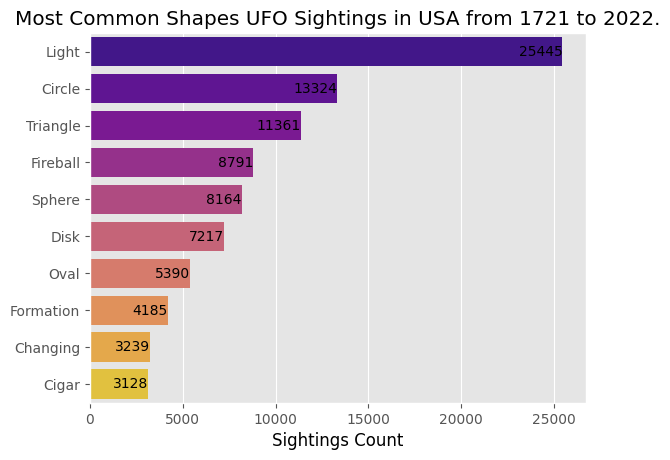

In [44]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

# Get the data a create the plor
top_shape = df_ufo.loc[~df_ufo.Shape.isin(['Unknown'])].Shape.value_counts().nlargest(10)
sns.barplot(x=top_shape, y=top_shape.index, palette="plasma")

# labels
for i, v in enumerate(top_shape):
    ax.annotate(str(v), xy=(v, i), ha='right', va='center', color='black')

# Plot
plt.xlabel("Sightings Count", color="black")
plt.title("Most Common Shapes UFO Sightings in USA from {:.0f} to {:.0f}.".format(df_ufo.Date.dt.year.min(), df_ufo.Date.dt.year.max()), color="black")
plt.show()


Text(0.5, 1.0, 'Cities with most UFO Sightings from 1721 to 2022  in USA')

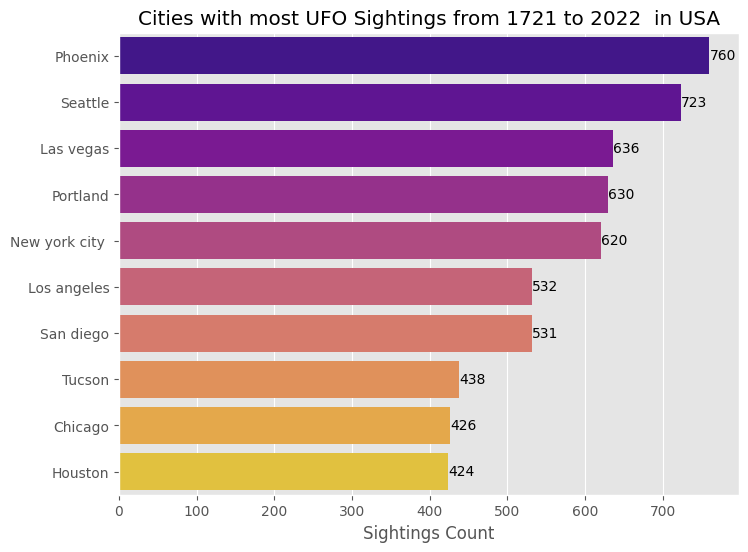

In [45]:
plt.figure(figsize=(8,6))
top_city = df_ufo.City.value_counts().nlargest(10)


ax =sns.barplot(x=top_city, y=top_city.index, palette='plasma')

# labels
for i, v in enumerate(top_city):
    ax.annotate(str(v), xy=(v, i), ha='left', va='center', color='black')

plt.xlabel('Sightings Count')
plt.title('Cities with most UFO Sightings from {:.0f} to {:.0f}  in USA'.format(df_ufo.Date.dt.year.min(), df_ufo.Date.dt.year.max()))

Counts of sightings per day of the week

<Figure size 1500x1500 with 0 Axes>

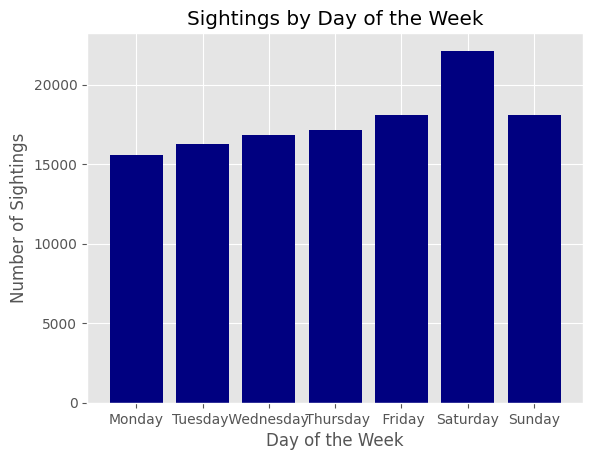

In [49]:
plt.figure(figsize=(15,15))

# Convert the "Date" column to a datetime object
df_ufo['Date'] = pd.to_datetime(df_ufo['Date'])

# Extract the day of the week from the "Date" column
df_ufo['DayOfWeek'] = df_ufo['Date'].dt.dayofweek

# Group the sightings by the day of the week
sightings_by_day = df_ufo.groupby('DayOfWeek')

# Count the number of sightings for each day of the week
sightings_count = sightings_by_day['Date'].count()

# Create a bar plot to display the results
fig, ax = plt.subplots()
ax.bar(sightings_count.index, sightings_count.values, color="Navy", width=0.8)
ax.set_xticks(range(7))
ax.set_xticklabels(['Monday', 'Tuesday ', ' Wednesday ', ' Thursday', ' Friday', 'Saturday', 'Sunday'])
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Sightings')
ax.set_title('Sightings by Day of the Week')
plt.show()

Sightings count per time zone and averate duration

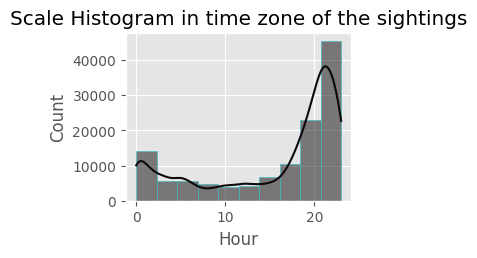

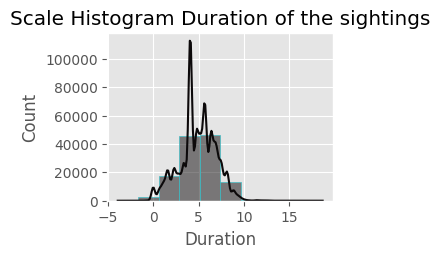

In [47]:
plt.figure()
plt.subplot(2,2,1)

sns.histplot(x = df_ufo['Hour'], kde=True, bins = 10, label = "From 0:00 hs to 24:00 hs", color="#0C090A", edgecolor ="#43BFC7")
plt.title('Scale Histogram in time zone of the sightings')
plt.show()

plt.subplot(2,2,2)
sns.histplot(x = np.log(df_ufo['Duration']), kde=True, bins = 10, color="#0C090A", edgecolor ="#43BFC7")
plt.title('Scale Histogram Duration of the sightings')
plt.show()

Quantities of sightings across years

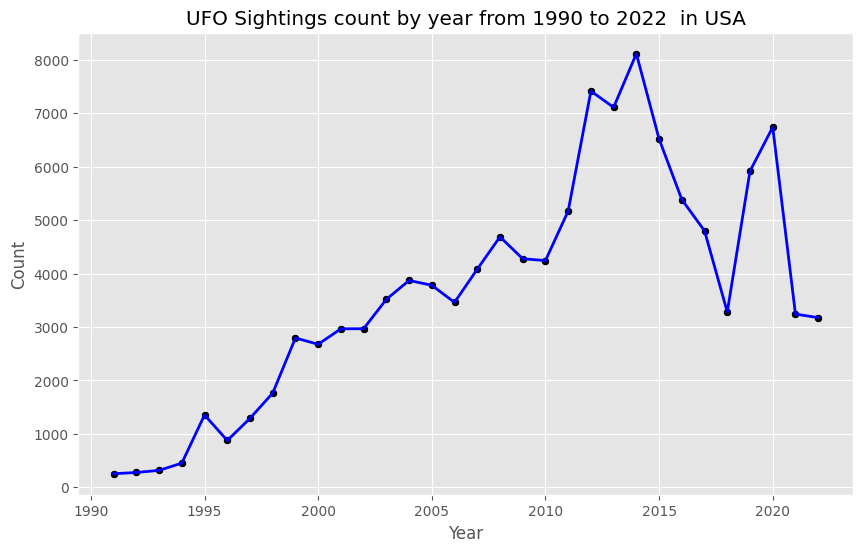

In [48]:
plt.figure(figsize=(10, 6))

# start year used in the plot 
year_figure = 1990

sightings_count = df_ufo.loc[df_ufo.Year > year_figure].groupby('Year').count().reset_index()


fig1 = sns.lineplot(x = "Year", y = "Duration", data = sightings_count, color="b", linewidth=2, markerfacecolor="k")
sns.scatterplot(x = "Year", y = "Duration", data = sightings_count,color="k")

fig1.set_xlabel('Year')
fig1.set_ylabel('Count')
fig1.set_title('UFO Sightings count by year from {:.0f} to {:.0f}  in USA'.format(year_figure, df_ufo.Date.dt.year.max()))

plt.show()